# Alzheimer’s Diagnostic with OASIS
A dataset of MRI brain scans of Alzheimer's patients and healthy controls.

### Importing
#### Importing Libraries

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from IPython.display import HTML
import seaborn as sns
from matplotlib.animation import FuncAnimation
import psutil
import gc
import pandas as pd
from tqdm import tqdm
import re
import nibabel as nib
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
test = '../OASIS2/OAS2_0002_MR2/RAW/mpr-1.nifti.img'

In [ ]:
# function to print bold text
def bold(text):
    return f"\033[1m{text}\033[0m"
    
# It will fix the file path to the correct path

def clearFilePath(path):
    file_name = re.sub(".*" + "/OASIS2/", '', path)
    file_name = re.sub('/RAW', '', file_name)
    file_name = re.sub('mpr-', '_', file_name)
    file_name = re.sub('.nifti.img', '', file_name)
    file_name = re.sub('/', '', file_name)
    return file_name

In [ ]:
clearFilePath(test)

'OAS2_0002_MR2_1'

### Load Data
#### Importing excel data

In [ ]:
df_demographics_input = pd.read_excel('../OASIS2/oasis_longitudinal_demographics.xlsx') 
df_demographics_input

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1986.550000,0.696106,0.883440
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004.479526,0.681062,0.875539
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678.290000,0.736336,1.045710
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1737.620000,0.713402,1.010000
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1697.911134,0.701236,1.033623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1692.880000,0.693926,1.036690
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688.009649,0.675457,1.039686
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319.020000,0.801006,1.330540
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1326.650000,0.795981,1.322890


In [ ]:
len(df_demographics_input['Subject ID'].unique())

150

In [ ]:
df_preprocessed = df_demographics_input.dropna()
df_preprocessed

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1986.550000,0.696106,0.883440
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004.479526,0.681062,0.875539
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215.330000,0.709512,1.444060
6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200.100000,0.718214,1.462380
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1688.580000,0.711502,1.039330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1692.880000,0.693926,1.036690
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688.009649,0.675457,1.039686
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319.020000,0.801006,1.330540
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1326.650000,0.795981,1.322890


In [ ]:
len(df_preprocessed['Subject ID'].unique())

142

In [ ]:
df_preprocessed = df_preprocessed.rename(columns={"M/F": "is_male", "Hand": "right_handed"})
df_preprocessed = df_preprocessed.replace({"is_male": {'M' : 1, 'F' : 0}})
df_preprocessed = df_preprocessed.replace({"right_handed": {'R' : 1, 'L' : 0}})
df_preprocessed

,Subject ID,MRI ID,Group,Visit,MR Delay,is_male,right_handed,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,0,0.2,0.000000,1,1,0.887755,0.608696,0.4,0.900000,0.0,0.991055,0.831825,0.556568
1,OAS2_0001,OAS2_0001_MR2,0,0.4,0.173172,1,1,0.897959,0.608696,0.4,1.000000,0.0,1.000000,0.813848,0.551591
5,OAS2_0004,OAS2_0004_MR1,0,0.2,0.000000,0,1,0.897959,0.782609,0.6,0.933333,0.0,0.606307,0.847845,0.909760
6,OAS2_0004,OAS2_0004_MR2,0,0.4,0.203865,0,1,0.918367,0.782609,0.6,0.900000,0.0,0.598709,0.858243,0.921301
7,OAS2_0005,OAS2_0005_MR1,0,0.2,0.000000,1,1,0.816327,0.521739,0.8,0.933333,0.0,0.842403,0.850223,0.654779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,OAS2_0128,OAS2_0128_MR1,0,0.2,0.000000,0,1,0.775510,0.695652,0.2,0.933333,0.0,0.671281,0.910296,0.821698
267,OAS2_0128,OAS2_0128_MR2,0,0.4,0.431982,0,1,0.806122,0.695652,0.2,0.966667,0.0,0.675245,0.883551,0.816876
268,OAS2_0129,OAS2_0129_MR1,0,0.2,0.000000,0,1,0.795918,0.782609,0.2,1.000000,0.0,0.718276,0.795684,0.767934
269,OAS2_0129,OAS2_0129_MR2,0,0.4,0.279272,0,1,0.816327,0.782609,0.2,1.000000,0.0,0.716580,0.792375,0.769755


In [ ]:
features = ['Visit', 'MR Delay', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']

In [ ]:
for feature in features:
    df_preprocessed[feature] = df_preprocessed[feature]/max(df_preprocessed[feature])
df_preprocessed

,Subject ID,MRI ID,Group,Visit,MR Delay,is_male,right_handed,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,0,0.2,0.000000,1,1,0.887755,0.608696,0.4,0.900000,0.0,0.991055,0.831825,0.575422
1,OAS2_0001,OAS2_0001_MR2,0,0.4,0.173172,1,1,0.897959,0.608696,0.4,1.000000,0.0,1.000000,0.813848,0.570276
5,OAS2_0004,OAS2_0004_MR1,0,0.2,0.000000,0,1,0.897959,0.782609,0.6,0.933333,0.0,0.606307,0.847845,0.940578
6,OAS2_0004,OAS2_0004_MR2,0,0.4,0.203865,0,1,0.918367,0.782609,0.6,0.900000,0.0,0.598709,0.858243,0.952511
7,OAS2_0005,OAS2_0005_MR1,0,0.2,0.000000,1,1,0.816327,0.521739,0.8,0.933333,0.0,0.842403,0.850223,0.676960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,OAS2_0128,OAS2_0128_MR1,0,0.2,0.000000,0,1,0.775510,0.695652,0.2,0.933333,0.0,0.671281,0.910296,0.849533
267,OAS2_0128,OAS2_0128_MR2,0,0.4,0.431982,0,1,0.806122,0.695652,0.2,0.966667,0.0,0.675245,0.883551,0.844547
268,OAS2_0129,OAS2_0129_MR1,0,0.2,0.000000,0,1,0.795918,0.782609,0.2,1.000000,0.0,0.718276,0.795684,0.793948
269,OAS2_0129,OAS2_0129_MR2,0,0.4,0.279272,0,1,0.816327,0.782609,0.2,1.000000,0.0,0.716580,0.792375,0.795830


In [ ]:
pca_features_full = ['Visit', 'MR Delay', 'is_male', 'right_handed', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']
pca_features = [ 'is_male', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']

In [ ]:
df_preprocessed = df_preprocessed.replace({"Group": {'Nondemented' : 0, 'Converted' : 1, 'Demented' : 2}})
df_preprocessed

,Subject ID,MRI ID,Group,Visit,MR Delay,is_male,right_handed,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,0,0.2,0.000000,1,1,0.887755,0.608696,0.4,0.900000,0.0,0.991055,0.831825,0.575422
1,OAS2_0001,OAS2_0001_MR2,0,0.4,0.173172,1,1,0.897959,0.608696,0.4,1.000000,0.0,1.000000,0.813848,0.570276
5,OAS2_0004,OAS2_0004_MR1,0,0.2,0.000000,0,1,0.897959,0.782609,0.6,0.933333,0.0,0.606307,0.847845,0.940578
6,OAS2_0004,OAS2_0004_MR2,0,0.4,0.203865,0,1,0.918367,0.782609,0.6,0.900000,0.0,0.598709,0.858243,0.952511
7,OAS2_0005,OAS2_0005_MR1,0,0.2,0.000000,1,1,0.816327,0.521739,0.8,0.933333,0.0,0.842403,0.850223,0.676960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,OAS2_0128,OAS2_0128_MR1,0,0.2,0.000000,0,1,0.775510,0.695652,0.2,0.933333,0.0,0.671281,0.910296,0.849533
267,OAS2_0128,OAS2_0128_MR2,0,0.4,0.431982,0,1,0.806122,0.695652,0.2,0.966667,0.0,0.675245,0.883551,0.844547
268,OAS2_0129,OAS2_0129_MR1,0,0.2,0.000000,0,1,0.795918,0.782609,0.2,1.000000,0.0,0.718276,0.795684,0.793948
269,OAS2_0129,OAS2_0129_MR2,0,0.4,0.279272,0,1,0.816327,0.782609,0.2,1.000000,0.0,0.716580,0.792375,0.795830


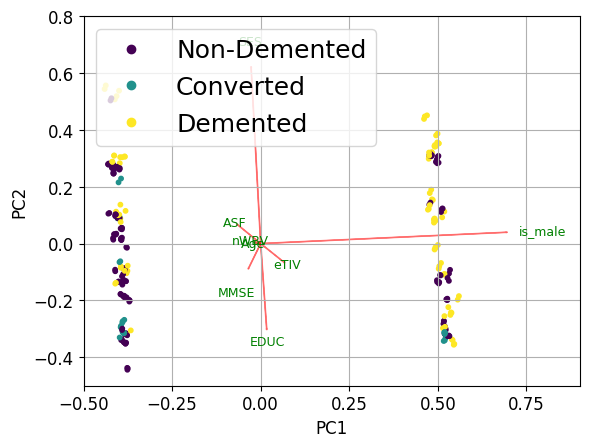

In [ ]:
from sklearn.decomposition import PCA

X = df_preprocessed[pca_features]
y = df_preprocessed['Group']
   
pca = PCA()
x_new = pca.fit_transform(X)

def myplot(score,coeff, orig_feat=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    scatter = plt.scatter(xs * scalex,ys * scaley, c = y, s = 10)
    labels = np.unique(y)
    handles = [plt.Line2D([],[],marker="o", ls="", color=scatter.cmap(scatter.norm(yi))) for yi in labels]
    labels = ['Non-Demented', 'Converted', 'Demented']
    plt.legend(handles, labels)
    s = .7
    f = 1.2
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0]*s, coeff[i,1]*s,color = 'r',alpha = 0.5)
        if coeff[i,0] < .01 and coeff[i,1] < .01:
            f = 2
        else:
            f = 1.15
        if orig_feat is None:
            plt.text(coeff[i,0] * f * s, coeff[i,1] * f * s, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0] * f * s, coeff[i,1] * f * s, orig_feat[i], color = 'g', ha = 'center', va = 'center', fontsize=9)
    plt.xlim(-.5,.9)
    plt.ylim(-.5,.8)
    plt.xlabel("PC{}".format(1), fontsize=12)
    plt.ylabel("PC{}".format(2), fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid()

#Call the function. Use only the 2 PCs.
myplot(score=x_new[:,0:2],coeff=np.transpose(pca.components_[0:2, :]),orig_feat=pca_features
      )
plt.savefig('PCA_plot.png', dpi=300, bbox_inches='tight')
#plt.show()

In [ ]:
df_preprocessed = df_preprocessed.replace({"CDR": {0:0, 0.25:1, 0.5:1, 1:1}})
df_preprocessed

,Subject ID,MRI ID,Group,Visit,MR Delay,is_male,right_handed,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,0,0.2,0.000000,1,1,0.887755,0.608696,0.4,0.900000,0.0,0.991055,0.831825,0.575422
1,OAS2_0001,OAS2_0001_MR2,0,0.4,0.173172,1,1,0.897959,0.608696,0.4,1.000000,0.0,1.000000,0.813848,0.570276
5,OAS2_0004,OAS2_0004_MR1,0,0.2,0.000000,0,1,0.897959,0.782609,0.6,0.933333,0.0,0.606307,0.847845,0.940578
6,OAS2_0004,OAS2_0004_MR2,0,0.4,0.203865,0,1,0.918367,0.782609,0.6,0.900000,0.0,0.598709,0.858243,0.952511
7,OAS2_0005,OAS2_0005_MR1,0,0.2,0.000000,1,1,0.816327,0.521739,0.8,0.933333,0.0,0.842403,0.850223,0.676960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,OAS2_0128,OAS2_0128_MR1,0,0.2,0.000000,0,1,0.775510,0.695652,0.2,0.933333,0.0,0.671281,0.910296,0.849533
267,OAS2_0128,OAS2_0128_MR2,0,0.4,0.431982,0,1,0.806122,0.695652,0.2,0.966667,0.0,0.675245,0.883551,0.844547
268,OAS2_0129,OAS2_0129_MR1,0,0.2,0.000000,0,1,0.795918,0.782609,0.2,1.000000,0.0,0.718276,0.795684,0.793948
269,OAS2_0129,OAS2_0129_MR2,0,0.4,0.279272,0,1,0.816327,0.782609,0.2,1.000000,0.0,0.716580,0.792375,0.795830


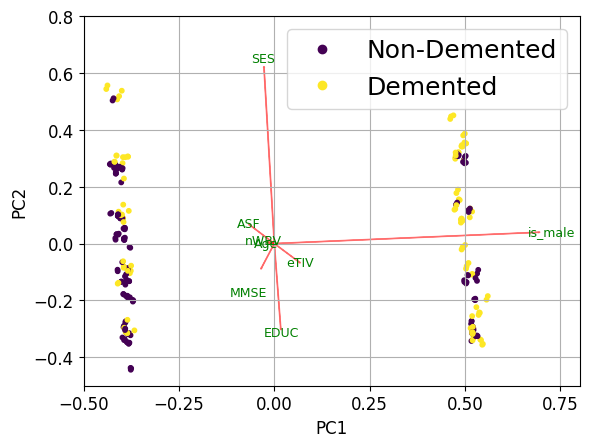

In [ ]:
from sklearn.decomposition import PCA

X = df_preprocessed[pca_features]
y = df_preprocessed['CDR']
   
pca = PCA()
x_new = pca.fit_transform(X)

def myplot(score,coeff, orig_feat=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    scatter = plt.scatter(xs * scalex,ys * scaley, c = y, s = 10)
    labels = np.unique(y)
    handles = [plt.Line2D([],[],marker="o", ls="", color=scatter.cmap(scatter.norm(yi))) for yi in labels]
    labels = ['Non-Demented', 'Demented']
    plt.legend(handles, labels)
    s = .7
    f = 1.2
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0]*s, coeff[i,1]*s,color = 'r',alpha = 0.5)
        if coeff[i,0] < .01 and coeff[i,1] < .01:
            f = 2
        else:
            f = 1.05
        if orig_feat is None:
            plt.text(coeff[i,0] * f * s, coeff[i,1] * f * s, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0] * f * s, coeff[i,1] * f * s, orig_feat[i], color = 'g', ha = 'center', va = 'center', fontsize=9)
    plt.xlim(-.5,.8)
    plt.ylim(-.5,.8)
    plt.xlabel("PC{}".format(1), fontsize=12)
    plt.ylabel("PC{}".format(2), fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid()

#Call the function. Use only the 2 PCs.
myplot(score=x_new[:,0:2],coeff=np.transpose(pca.components_[0:2, :]),orig_feat=pca_features
      )
plt.savefig('PCA_plot.png', dpi=300, bbox_inches='tight')

[pca] >Extracting column labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [12] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [5] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [12] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


[scatterd] >INFO> Create scatterplot
[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 with loadings.


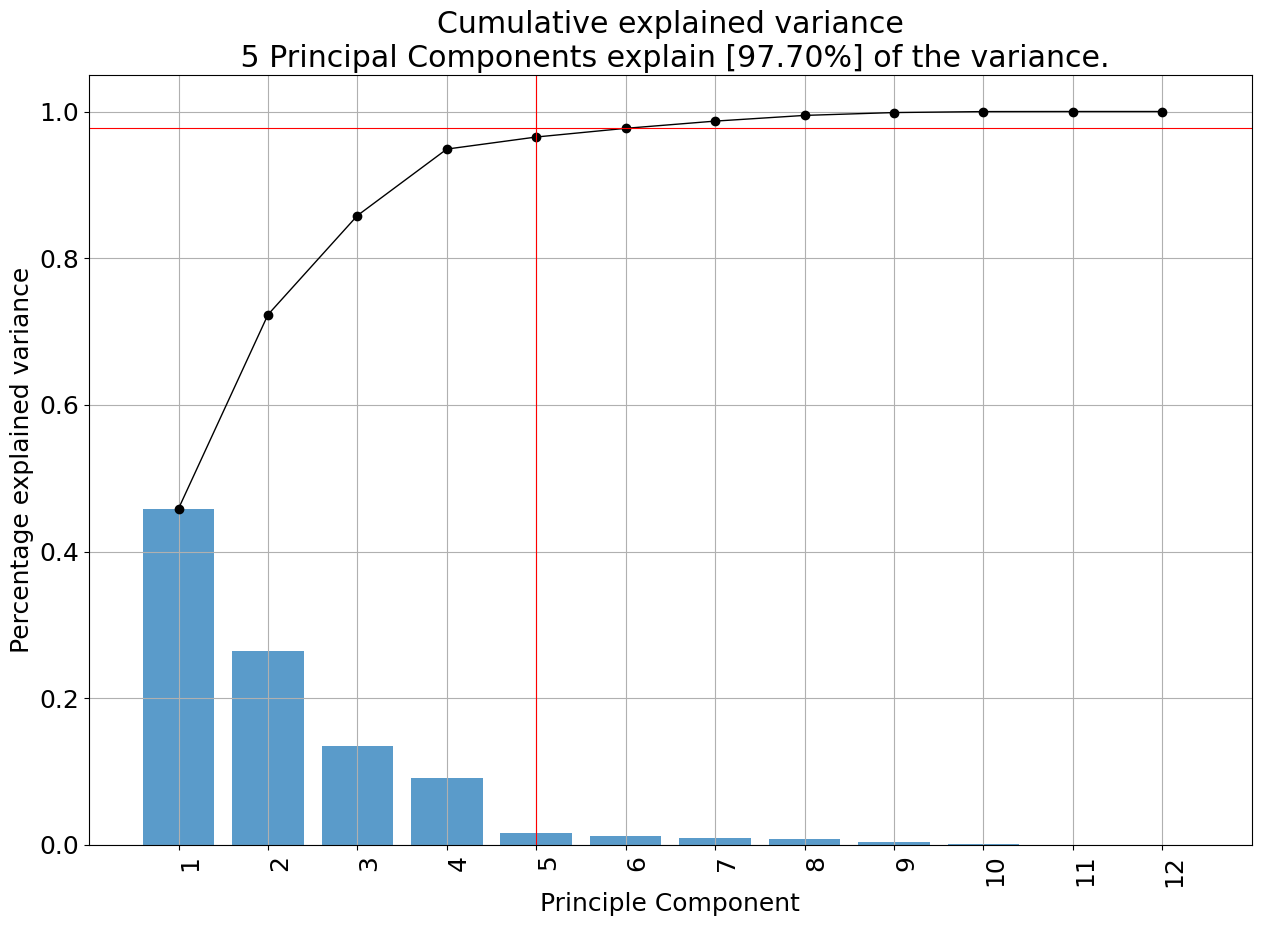

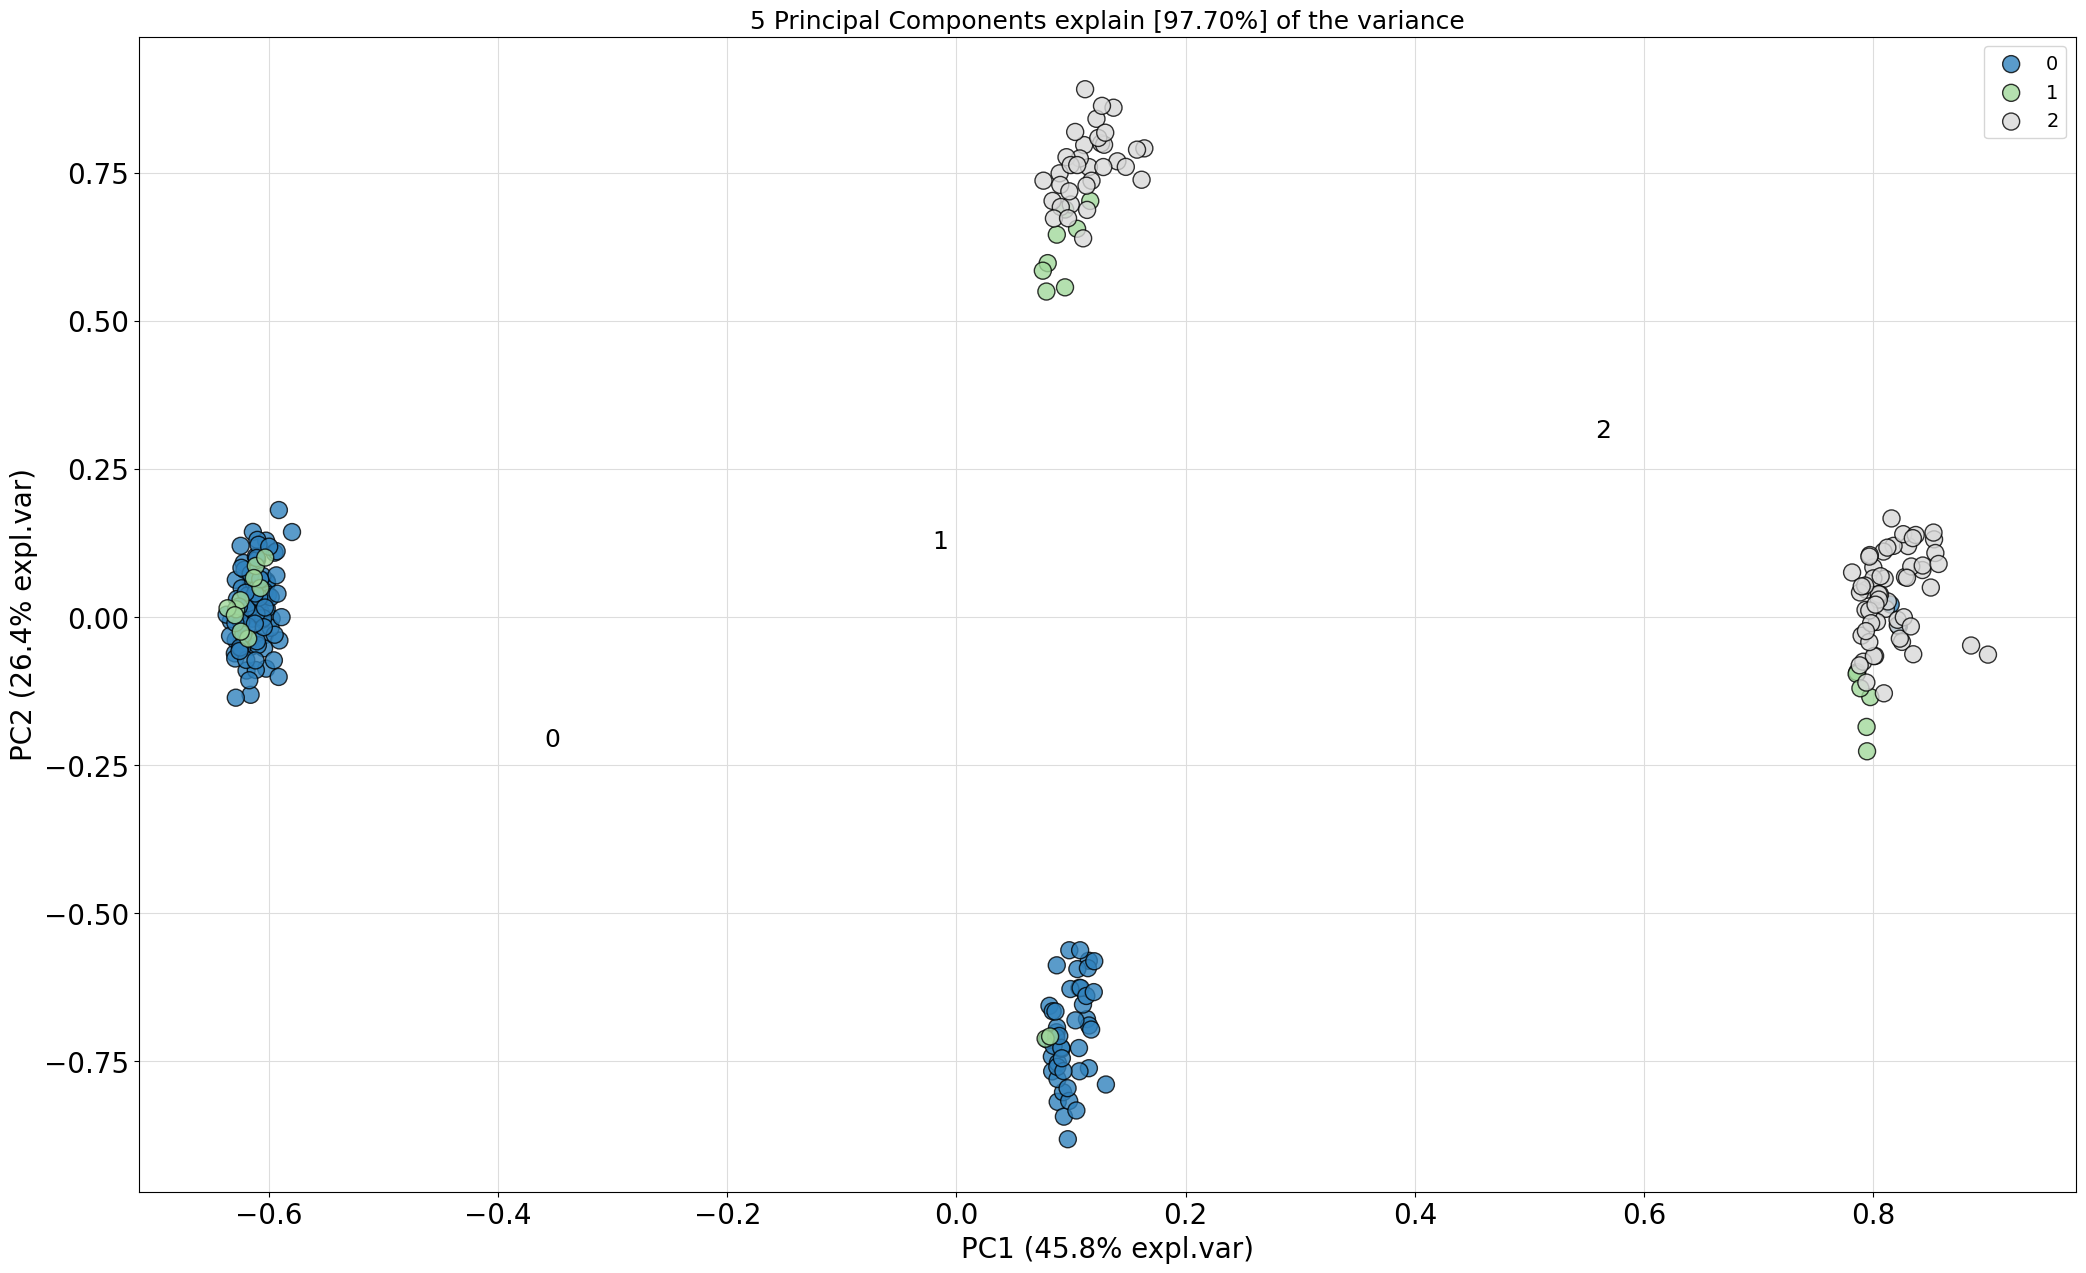

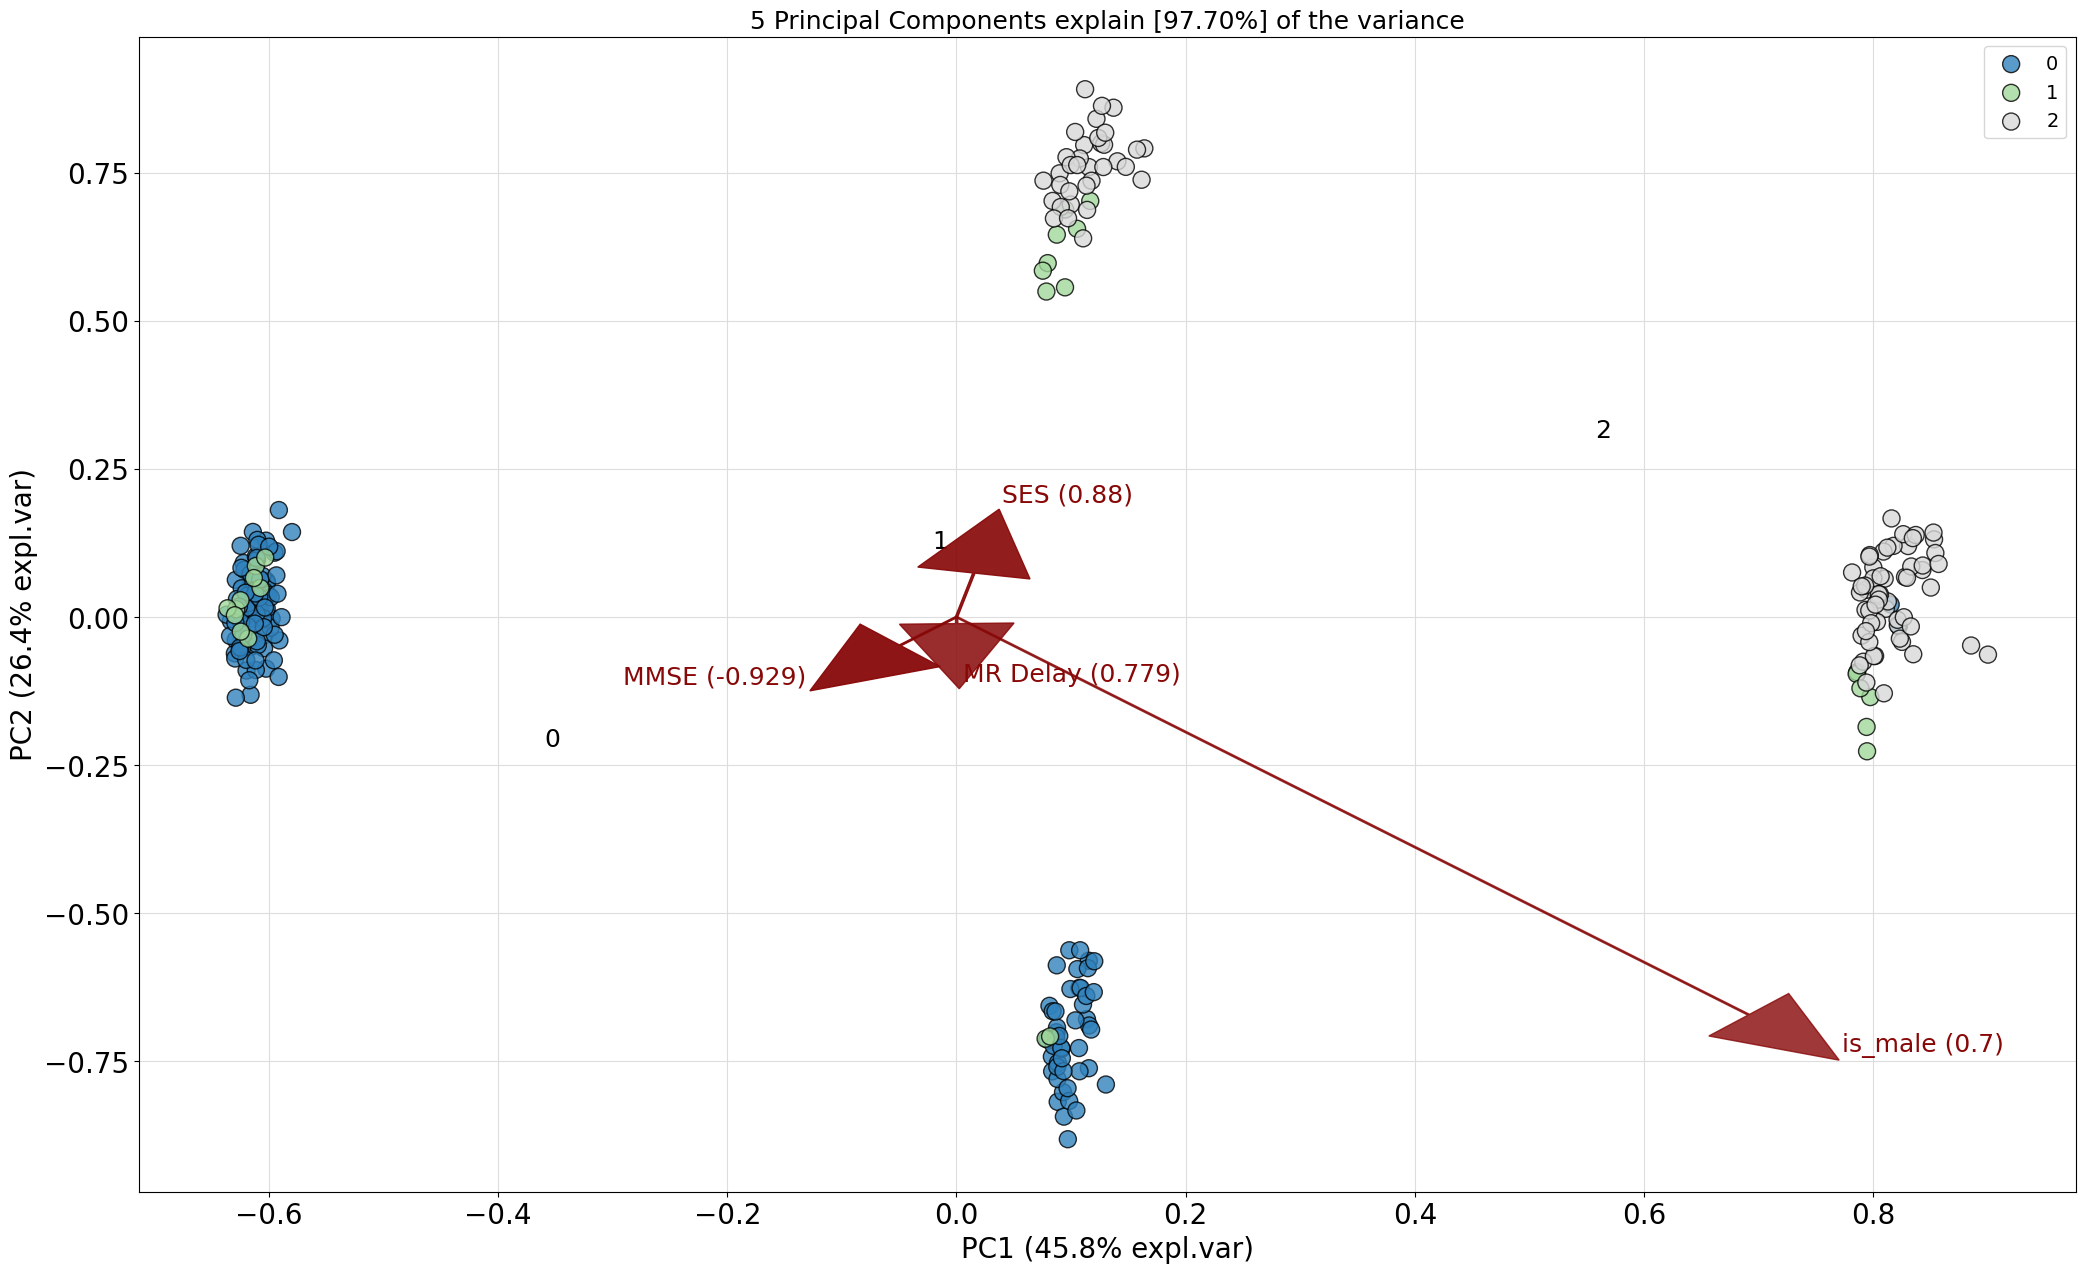

In [ ]:

from pca import pca
import pandas as pd
from sklearn.datasets import load_iris


X = df_preprocessed[pca_features_full]
y = df_preprocessed['Group']

model = pca(n_components=.95)

# Fit and transform
results = model.fit_transform(X=X, row_labels=y)

# Plot the explained variance
fig, ax = model.plot()
fig.savefig('explained_variance.png', dpi=300, bbox_inches='tight')

# Scatter the first two PCs
fig, ax = model.scatter()

# Create a biplot
fig, ax = model.biplot(n_feat=4)


In [ ]:
len(df_demographics_input[df_demographics_input['Group'] != 'Converted'])

233

### Processing image data.
This code is responsible for loading MRI "nifti.img" files from a specified directory, processing the data, and cleaning the data based on none values in the demographics.
It utilizes the `nibabel` library to load the MRI files and extract relevant information.

In [ ]:
rootdir = '../OASIS2'


mri_patients_scans_name = []
mri_ignored_file_names = []
mri_images = []
mri_images_data = []

# Count the total number of files in the root directory
file_count = sum(len(files) for _, _, files in os.walk(rootdir))

print(f'Found {file_count} files in "{rootdir}" subdirectories\n')
print('Loading MRI "nifti.img" files:')

# Display a progress bar using tqdm
with tqdm(total=file_count) as pbar:
    for subdir, dirs, files in os.walk(rootdir):
        for file in files:
            filepath = os.path.join(subdir, file)

            if filepath.endswith("nifti.img"):
                try:
                    # Load the MRI image using nibabel
                    img = nib.load(filepath)
                    mri_images.append(img)
                    mri_patients_scans_name.append(clearFilePath(filepath))
                    mri_images_data.append(img.get_fdata())
                except nib.filebasedimages.ImageFileError as e:
                    # If the file type is not recognized, ignore the file and print a message
                    mri_ignored_file_names.append(filepath)
                    print(
                        f'File type not recognized - ignoring "{filepath}" file')

            pbar.update(1)

print(
    f'\nFound and loaded {len(mri_patients_scans_name)} MRI "nifti.img" files from "{rootdir}" subdirectories')
print(f'Ignored:')
print(*mri_ignored_file_names, sep=' ')

# Get unique patient visit names from MRI file names
mri_patients_visits_names = np.unique(
    [re.sub('_\d\Z', '', i) for i in mri_patients_scans_name])

# Filter the demographics dataframe based on the MRI IDs
df_demographics = df_demographics_input[df_demographics_input['MRI ID'].isin(
    mri_patients_visits_names)]

print("Before cleaning data from none values from demographics:")
print(
    f'Number of patients visits: {len(np.unique(mri_patients_visits_names))}')
print(f'Number of patients scans: {len(mri_patients_scans_name)}')
print(
    f'Number of slices of MRI scans (unique values): {np.unique([arr.shape[2] for arr in mri_images_data])}')

# Drop rows in demographics dataframe with None values
df_drop = df_demographics[df_demographics.isna().any(axis=1)]
list_drop = df_drop['MRI ID'].tolist()
print(
    f'None value rows in demographics data to drop: {df_demographics.isnull().any(axis=1).sum()}')
df_demographics = df_demographics.dropna().reset_index(drop=True)

# Remove corresponding MRI files and names based on dropped rows
fname_drop = [fname for fname in mri_patients_scans_name if re.sub(
    '_\d\Z', '', fname) in list_drop]
fname_drop_id = [i for i in range(
    len(mri_patients_scans_name)) if mri_patients_scans_name[i] in fname_drop]

for i in reversed(fname_drop_id):
    del mri_images[i]
    del mri_patients_scans_name[i]
    del mri_images_data[i]

print(f"After cleaning data from none values from demographics:")
print(f"Number of removed MRI files: {len(fname_drop)}")
print(
    f"Number of patients visits: {len(np.unique(mri_patients_visits_names))}")
print(f"Number of patients scans: {len(mri_patients_scans_name)}")


Found 3376 files in "../OASIS2" subdirectories

Loading MRI "nifti.img" files:


100%|██████████████████████████████| 3376/3376 [03:00<00:00, 18.72it/s]


Found and loaded 1368 MRI "nifti.img" files from "../OASIS2" subdirectories
Ignored:

Before cleaning data from none values from demographics:
Number of patients visits: 374
Number of patients scans: 1368
Number of slices of MRI scans (unique values): [128]
None value rows in demographics data to drop: 0
After cleaning data from none values from demographics:
Number of removed MRI files: 0
Number of patients visits: 374
Number of patients scans: 1368


#### Visualizing MRI Data
This code segment performs visualizations of MRI slices using the matplotlib.pyplot library. It demonstrates the visualization of different slices from an MRI image.

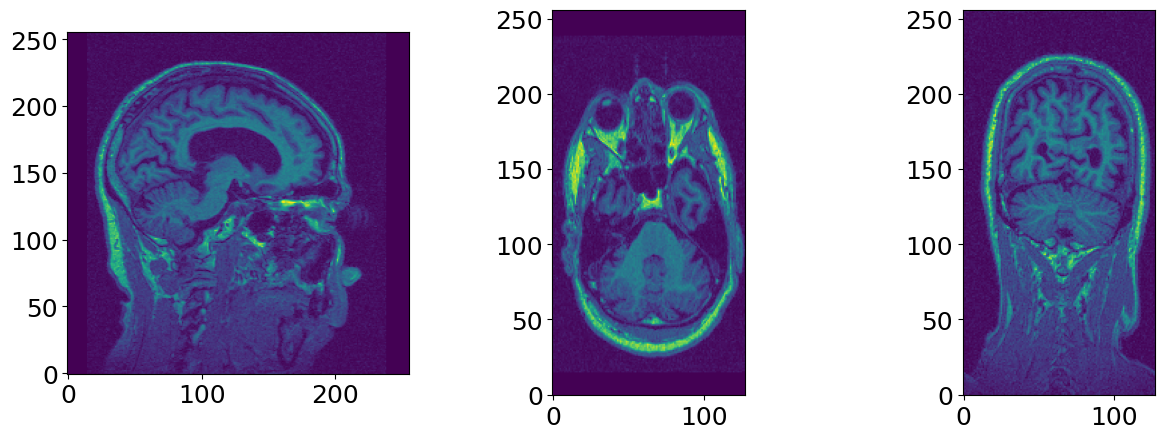

In [ ]:
i = np.transpose(mri_images_data[0], (1, 0, 2, 3))
# Transpose the MRI image data to rearrange the dimensions for visualization

plt.figure(figsize=(15, 5))
# Create a figure with a size of 15x5 inches

plt.subplot(131)
# Define the first subplot in a 1x3 grid

plt.imshow(np.transpose(
    mri_images_data[0][:, :, 75], (1, 0, 2)), origin='lower')
# Display the transposed MRI image slice at index 75
# Adjust the dimensions for proper display using np.transpose()
# Set the origin of the image to the lower-left corner

plt.subplot(132)
# Define the second subplot in the grid

plt.imshow(i[120, :, :], origin='lower')
# Display a different slice of the transposed MRI image (at index 120)

plt.subplot(133)
# Define the third subplot in the grid

plt.imshow(i[:, 70, :], origin='lower')
# Display another slice of the transposed MRI image (at index 70)

plt.show()
# Show the figure with the three subplots and MRI slice visualizations


In [ ]:
image, s = 40, 75
# Define the image and slice indices to visualize

img_data = mri_images_data[image]
# Retrieve the MRI image data for the specified image index

img_data = np.transpose(img_data, (1, 0, 2, 3))
# Transpose the MRI image data to rearrange the dimensions for visualization

mid_slice_x = img_data[:, :, s]
# Extract the slice at index 's' from the transposed MRI image data

mri_file_name = mri_patients_scans_name[image]
# Retrieve the MRI file name corresponding to the specified image index

patient_id = list(filter(None, re.split('_|MR', mri_file_name)))[1:]
# Extract the patient ID from the MRI file name using regex

patient_data = df_demographics[df_demographics['MRI ID'] == re.sub(
    '_\d\Z', '', mri_file_name)]
# Retrieve the demographics data for the patient ID obtained from the MRI file name

plt.title(f'MRI ID: {patient_id[0]} - visit: {patient_id[1]} - scan: {patient_id[2]}\nGroup: {patient_data.iloc[0][2]}\nSlice {s}')
# Set the title of the plot with relevant information, such as MRI ID, visit, scan, group, and slice index

plt.imshow(mid_slice_x, cmap='gray', origin='lower')
# Display the extracted MRI slice using a grayscale colormap and with the origin set to the lower-left corner

plt.colorbar(label='Signal intensity')
# Add a colorbar to the plot with the label 'Signal intensity'

plt.show()
# Show the plot with the MRI slice visualization

patient_data
# Display the demographics data for the corresponding patient ID


IndexError: single positional indexer is out-of-bounds

In [ ]:
mri_patients_scans_name[0]

In [ ]:
df = pd.DataFrame(columns=['id'] + df_preprocessed.columns.values.tolist())

for i in range(0, len(mri_patients_scans_name)):
    mri_file_name = mri_patients_scans_name[i]
    patient_data = df_preprocessed[df_preprocessed['MRI ID'] == re.sub('_\d\Z', '', mri_file_name)]
    df = pd.concat([df, patient_data], ignore_index=True)
    df.loc[i,'id']=mri_file_name
    #patient_data
df

In [ ]:
df = df.drop(columns=['Subject ID', 'MRI ID'])

In [ ]:
df = df.sort_values(by='id',ignore_index=True)

In [ ]:
df

In [ ]:
df[df.isna().any(axis=1)]

In [ ]:
df.iloc[52]

In [ ]:
df.iloc[51] = df.iloc[52]
#I tried to create a more elegent solution here, but pandas is giving me a headache. I tried to reference all columns except id and set those, but pandas errors out on me.

In [ ]:
 df.loc[51,'id'] = 'OAS2_0012_MR23906-3'

In [ ]:
df = df.rename(columns={"Group": "y"})

In [ ]:
os.makedirs('../examples/data/oasis2', exist_ok=True)  
df.to_csv('../examples/data/oasis2/oasis2.csv', index=False)

In [ ]:
len(mri_patients_scans_name)

IndexError: single positional indexer is out-of-bounds

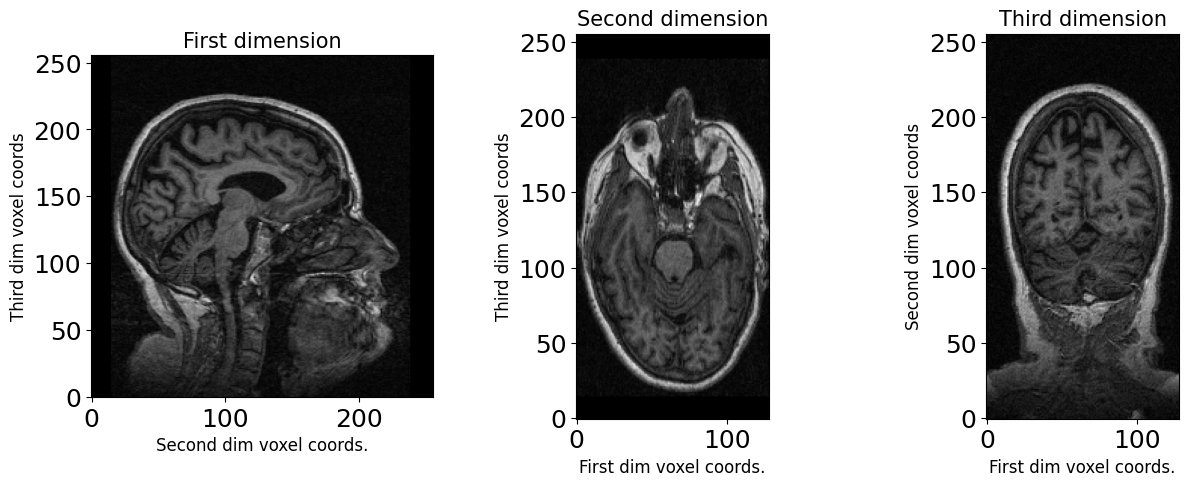

In [72]:
slice_no = [120, 70, 70]
# Define the slice numbers to visualize in each dimension

fig, ax = plt.subplots(ncols=3, figsize=(15, 5))
# Create a figure with three subplots arranged in a single row

ax[0].imshow(img_data[:, :, slice_no[2]], origin='lower', cmap='gray')
ax[0].set_xlabel('Second dim voxel coords.', fontsize=12)
ax[0].set_ylabel('Third dim voxel coords', fontsize=12)
ax[0].set_title('First dimension', fontsize=15)
# Display the slice along the first dimension in the first subplot
# Set the x-axis and y-axis labels
# Set the title for the subplot indicating the dimension

ax[1].imshow(img_data[slice_no[0], :, :], origin='lower', cmap='gray')
ax[1].set_xlabel('First dim voxel coords.', fontsize=12)
ax[1].set_ylabel('Third dim voxel coords', fontsize=12)
ax[1].set_title(f'Second dimension', fontsize=15)
# Display the slice along the second dimension in the second subplot
# Set the x-axis and y-axis labels
# Set the title for the subplot indicating the dimension

ax[2].imshow(img_data[:, slice_no[1], :], origin='lower', cmap='gray')
ax[2].set_xlabel('First dim voxel coords.', fontsize=12)
ax[2].set_ylabel('Second dim voxel coords', fontsize=12)
ax[2].set_title(f'Third dimension', fontsize=15)
# Display the slice along the third dimension in the third subplot
# Set the x-axis and y-axis labels
# Set the title for the subplot indicating the dimension

fig.suptitle(
    f'MRI ID: {patient_id[0]} - visit: {patient_id[1]} - scan: {patient_id[2]}\nGroup: {patient_data.iloc[0][2]}\nSlices: {slice_no}', fontsize=15)
# Set the super-title of the figure with relevant information, such as MRI ID, visit, scan, group, and the selected slice numbers

fig.tight_layout()
# Adjust the subplots layout to prevent overlapping

Text(0.5, 1.0, 'eTIV vs Age')

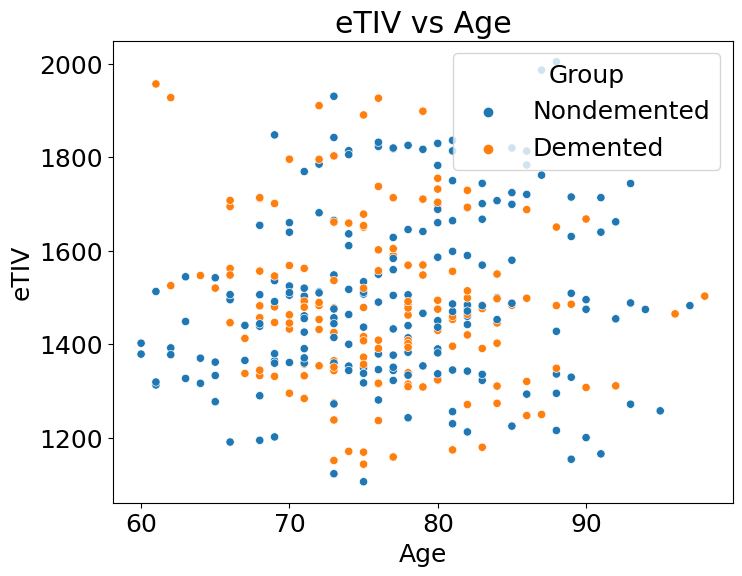

In [ ]:

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_demographics_input[df_demographics_input['Group']
                != 'Converted'], y='eTIV', x='Age', hue='Group')
plt.title("eTIV vs Age")


Text(0.5, 1.0, 'nWBV vs Age')

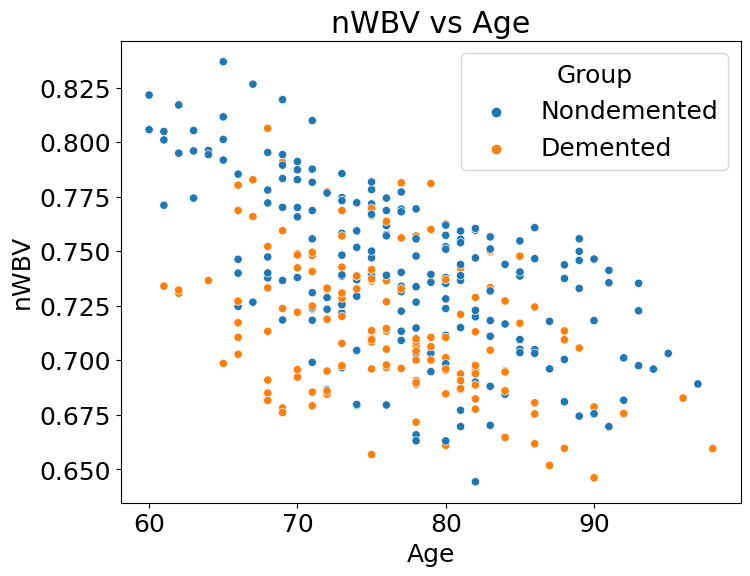

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_demographics_input[df_demographics_input['Group']
                != 'Converted'], y='nWBV', x='Age', hue='Group')
plt.title("nWBV vs Age")


In [86]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_demographics_input['Group'])


In [87]:
mri_images_data[0].shape


(256, 256, 128, 1)

In [88]:
# Retrieve the patient details from the demographics data
def get_patient_detail(index):
    mri_file_name = mri_patients_scans_name[index]
    patient_data = df_demographics_input[df_demographics_input['MRI ID'] == re.sub(
        '_\d\Z', '', mri_file_name)]
    return patient_data


### Data Preprocessing
Encoding categorical label data in data preprocessing. This code segment demonstrates the use of the LabelEncoder classes to encode categorical data. 

Also, we are selecting only three frame images from 3D image  dataset to reduce the computational time for the model training.Also VGG16 model is used for transfer learning and it only support only 3 channel images.


In [22]:
# selects a subset of three consecutive slices (indexed 70, 100, and 125) from each MRI image in the mri_images_data array.
# It then reshapes the subset to have a consistent shape of (256, 256, 3) representing an RGB image.
# The resulting transformed data is stored in the mri_images_data_p numpy array for further processing or visualization.
mri_images_data_p = np.array(
    [i[:, :, [70, 100, 125]].reshape(256, 256, 3) for i in mri_images_data])


In [34]:
from PIL import Image

save_path = '../examples/data/oasis2/mri/img/'

os.makedirs(save_path, exist_ok=True)  

for i, img in enumerate(mri_images_data_p):
    #img = img.transpose(2, 0, 1)
    im = Image.fromarray((img * 255).astype(np.uint8), 'RGB')
    im.save(save_path + mri_patients_scans_name[i] + ".jpg")

In [36]:
im = Image.fromarray((mri_images_data_p[0][0] * 255).astype(np.uint8))
im.save('test.jpg')

In [35]:
print(f"{bold('Length if image data: ')}{len(mri_images_data)}")
print(f"{bold('Length of y: ')}{len(cnn_y)}")
print(f"{bold('shape of a image: ')}{mri_images_data_p[0].shape}")


Length if image data: 209

Length of y: 209

shape of a image: (256, 256, 3)


#### Importing pre-trained model

VGG16 is a popular convolution's neural network architecture widely used for various computer vision tasks, including image classification. ImageNet is a large-scale dataset with millions of labeled images used for training deep learning models.

In [42]:
from tensorflow.keras import applications
# VGG16 pre-trained model without fully connected layers and with different input dimensions
input_shape = (256, 256, 3)
model = applications.VGG16(
    weights="imagenet", include_top=False, input_shape=input_shape)
model.summary()


Model: "vgg16"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         

                                                                 

 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      

                                                                 

 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     

                                                                 

 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         

                                                                 

 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     

                                                                 

 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    

                                                                 

 block2_pool (MaxPooling2D)  (None, 64, 64, 1

In [43]:
# freeze the models layers
for layer in model.layers:
    layer.trainable = False


In [46]:
from tensorflow.keras.layers import LeakyReLU, Flatten, Dense
from tensorflow.keras.models import Model

# Flatten the output of the base model
flatten = Flatten()(model.output)

# Add a fully connected layer with 64 units
fc1 = Dense(64)(flatten)

# Apply LeakyReLU activation to introduce non-linearity
leaky_relu = LeakyReLU(alpha=0.1)(fc1)

# Add the final output layer with 3 units and softmax activation
output = Dense(3, activation='softmax')(leaky_relu)

# Create a new model by specifying the input and output layers
new_model = Model(inputs=model.input, outputs=output)

# Compile the new model with optimizer, loss function, and metrics
new_model.compile(optimizer='adam',
                  loss='categorical_crossentropy', metrics=['accuracy'])

# Print the summary of the new model
new_model.summary()


Model: "model_2"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         

                                                                 

 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      

                                                                 

 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     

                                                                 

 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         

                                                                 

 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     

                                                                 

 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    

                                                                 

 block2_pool (MaxPooling2D)  (None, 64, 64,

#### Splitting data into training and test

In [47]:
from sklearn.model_selection import train_test_split

#  split the data into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(
    mri_images_data_p, cnn_y, test_size=.25)

print(f"{bold('Train shape: ')}{train_X.shape}")
print(f"{bold('Test shape: ')}{test_X.shape}")


Train shape: (156, 256, 256, 3)

Test shape: (53, 256, 256, 3)


#### Training the model

In [48]:
from tensorflow.keras.callbacks import EarlyStopping

# Define an early stopping callback with a patience of 6 epochs
early_stopping = EarlyStopping(patience=6)

# Train the new model with early stopping
hist = new_model.fit(train_X, train_y, validation_split=.2,
                     epochs=20, callbacks=[early_stopping])


Epoch 1/20

4/4 [==============================] - 19s 5s/step - loss: 756.2971 - accuracy: 0.3871 - val_loss: 203.5698 - val_accuracy: 0.5938

Epoch 2/20

4/4 [==============================] - 18s 5s/step - loss: 113.2766 - accuracy: 0.7419 - val_loss: 60.3831 - val_accuracy: 0.7812

Epoch 3/20

4/4 [==============================] - 19s 5s/step - loss: 17.9582 - accuracy: 0.9274 - val_loss: 47.1337 - val_accuracy: 0.7812

Epoch 4/20

4/4 [==============================] - 17s 5s/step - loss: 15.8794 - accuracy: 0.9194 - val_loss: 21.7707 - val_accuracy: 0.8750

Epoch 5/20

4/4 [==============================] - 22s 6s/step - loss: 4.4013 - accuracy: 0.9839 - val_loss: 0.0000e+00 - val_accuracy: 1.0000

Epoch 6/20

4/4 [==============================] - 22s 6s/step - loss: 1.5987 - accuracy: 0.9919 - val_loss: 0.0997 - val_accuracy: 0.9688

Epoch 7/20

4/4 [==============================] - 26s 7s/step - loss: 2.1814 - accuracy: 0.9758 - val_loss: 0.0000e+00 - val_accuracy: 1.0000

E

#### Visualization of Accuracy and Validation loss of the model while training

<AxesSubplot: title={'center': 'Accuracy vs Validaion Accuracy'}>

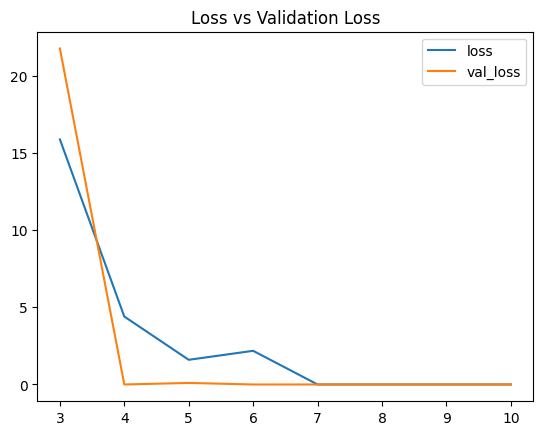

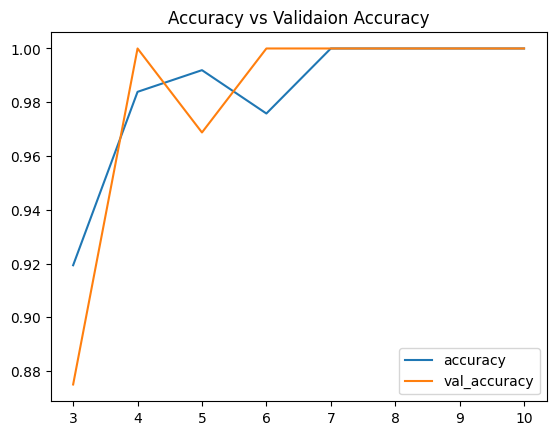

In [49]:
pd.DataFrame(hist.history).iloc[3:, [0, 2]].plot(
    title="Loss vs Validation Loss")
pd.DataFrame(hist.history).iloc[3:, [1, 3]].plot(
    title="Accuracy vs Validaion Accuracy")


#### Prediction

In [50]:
# predictions on x_test dataset
y_pred = np.argmax(new_model.predict(test_X), axis=1)


2/2 [==============================] - 5s 2s/step
